# Training models 

In this section, we will process our datasets through transformers and scalers before we run a predictive model. 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### By looking at the dataset, we will drop the following columns: 
* user: the user ID 
* first_open_date: it is a date. 
* enrolled_date: it is a date. And from the previous EDA chapter we know that most people enrolled within 3 hours after free trial, so most likely, the enrolled date is identical to first_open_date.

In [2]:
data = pd.read_csv('../data/clean/appdata_cleaned.csv')
display(data.shape)
display(data.info())
data.head()

(48361, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48361 entries, 0 to 48360
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  48361 non-null  int64 
 1   first_open_date       48361 non-null  object
 2   first_open_hours      48361 non-null  int64 
 3   first_open_month      48361 non-null  int64 
 4   first_open_year       48361 non-null  int64 
 5   dayofweek             48361 non-null  int64 
 6   age                   48361 non-null  int64 
 7   numscreens            48361 non-null  int64 
 8   minigame              48361 non-null  int64 
 9   used_premium_feature  48361 non-null  int64 
 10  enrolled              48361 non-null  int64 
 11  liked                 48361 non-null  int64 
 12  enrolled_date         30263 non-null  object
 13  C_check               48361 non-null  int64 
 14  L_check               48361 non-null  int64 
 15  S_check               48361 non-null

None

,user,first_open_date,first_open_hours,first_open_month,first_open_year,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,enrolled_date,C_check,L_check,S_check,V_check,G_check
0,235136,2012-12-27,2,12,0,3,23,15,0,0,0,0,NaN,0,1,0,1,1
1,333588,2012-12-02,1,12,0,6,24,13,0,0,0,0,NaN,0,1,0,1,1
2,254414,2013-03-19,19,3,1,1,23,3,0,1,0,1,NaN,0,1,0,0,0
3,234192,2013-07-05,16,7,1,4,28,40,0,0,1,0,2013-07-05,1,1,0,1,1
4,51549,2013-02-26,18,2,1,1,31,32,0,0,1,1,2013-02-26,1,1,0,1,1


In [3]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['user','first_open_date','enrolled_date','enrolled'],axis=1)
y = data['enrolled']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Since we don’t carry ant categorical columns. We won’t split the dataset into two. 
### From the previous EDA, we noticed that two columns containing continuous numerical data are both positively skewed. So naturally, we will first operate a power transformer.  

In [4]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train)
X_train_pt_np = pt.transform(X_train)
X_train_pt = pd.DataFrame(X_train_pt_np,columns=X_train.columns,index=X_train.index)

X_test_pt_np = pt.transform(X_test)
X_test_pt = pd.DataFrame(X_test_pt_np,columns=X_test.columns,index=X_test.index)

X_train_pt.head()

,first_open_hours,first_open_month,first_open_year,dayofweek,age,numscreens,minigame,used_premium_feature,liked,C_check,L_check,S_check,V_check,G_check
44172,-0.036705,0.297119,0.364858,-1.594288,-0.386406,0.105062,2.874781,2.177727,-0.442879,-1.001360,0.720308,-0.329645,0.651083,0.508645
15283,-1.288833,0.594449,0.364858,-0.976377,-0.526751,0.487864,-0.347853,-0.459194,-0.442879,0.998642,0.720308,-0.329645,0.651083,0.508645
35779,0.353002,-0.050860,0.364858,-1.594288,-0.995753,0.953025,-0.347853,-0.459194,-0.442879,0.998642,0.720308,-0.329645,0.651083,0.508645
43883,0.353002,0.594449,0.364858,1.372592,0.624280,-0.471469,2.874781,-0.459194,-0.442879,-1.001360,0.720308,-0.329645,0.651083,-1.966009
45570,0.353002,-0.471376,0.364858,0.953725,-0.526751,1.449791,-0.347853,2.177727,-0.442879,-1.001360,0.720308,-0.329645,0.651083,0.508645


### One can tell that the shapes have been more or less corrected after the power transformer. 

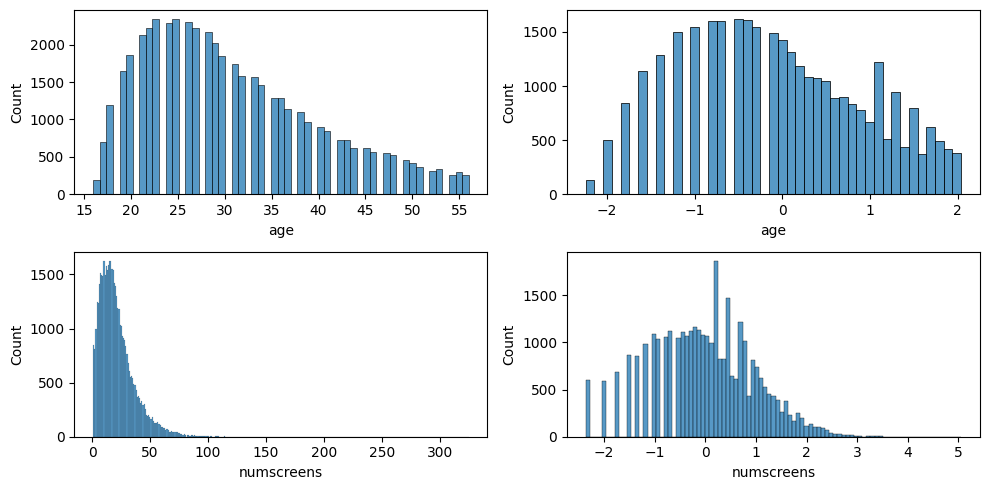

In [5]:
fig,ax = plt.subplots(2,2,figsize=(10,5))
sns.histplot(data=data,x='age',ax=ax[0,0])
sns.histplot(data=X_train_pt,x='age',ax=ax[0,1])
sns.histplot(data=data,x='numscreens',ax=ax[1,0])
sns.histplot(data=X_train_pt,x='numscreens',ax=ax[1,1])
plt.tight_layout()
plt.show()

### Now we will run a Min Max Scaler. And notice that all the dummy variables are back to 1 and 0. 

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_pt)
X_train_pt_np = scaler.transform(X_train_pt)
X_train_scaled = pd.DataFrame(X_train_pt_np,columns=X_train_pt.columns,index=X_train_pt.index)
X_test_pt_np = scaler.transform(X_test_pt)
X_test_scaled = pd.DataFrame(X_test_pt_np,columns=X_test_pt.columns,index=X_test_pt.index)

X_train_scaled.head()

,first_open_hours,first_open_month,first_open_year,dayofweek,age,numscreens,minigame,used_premium_feature,liked,C_check,L_check,S_check,V_check,G_check
44172,0.554864,0.572661,1.0,0.000000,0.433320,0.332994,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
15283,0.154289,0.656215,1.0,0.208269,0.400553,0.384575,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
35779,0.679537,0.474874,1.0,0.000000,0.291052,0.447255,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
43883,0.679537,0.656215,1.0,1.000000,0.669292,0.255307,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
45570,0.679537,0.356704,1.0,0.858819,0.400553,0.514193,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


### We will now run the regression model. 

Because the dependent variable is binary, we will use logistic regression instead of linear regression. 
We will also import the confusion matrix and cohen kappa score to find out the accuracy of our predictive model. 

As one can tell, due to data imbalance, the model is better at predicting people who will enrol rather than people who won’t. 

Thanks to the massive size of the dataset, we can downsampling those who enrolled so we can have a nearly 50-50 split. 
Once we ran the model again, we noticed that the cohen kappa score increased from 0.34 to 0.38.

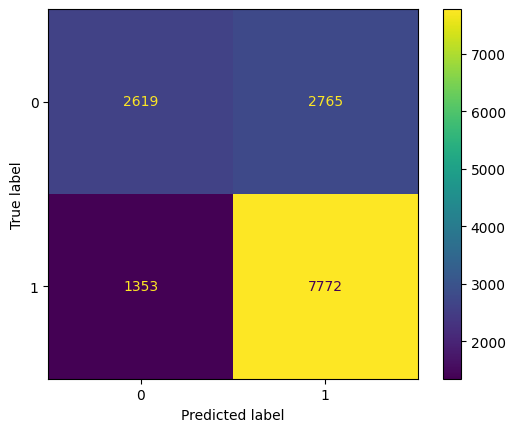

              precision    recall  f1-score   support

           0       0.65      0.47      0.55     12714
           1       0.73      0.84      0.78     21138

    accuracy                           0.71     33852
   macro avg       0.69      0.66      0.67     33852
weighted avg       0.70      0.71      0.69     33852

              precision    recall  f1-score   support

           0       0.66      0.49      0.56      5384
           1       0.74      0.85      0.79      9125

    accuracy                           0.72     14509
   macro avg       0.70      0.67      0.68     14509
weighted avg       0.71      0.72      0.70     14509

The cohen_kappa_score of the test set is  0.35737986528696286


In [7]:
from sklearn.linear_model import LogisticRegression 

classification = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr')
classification.fit(X_train_scaled,y_train)

y_train_pred = classification.predict(X_train_scaled)
y_test_pred = classification.predict(X_test_scaled)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,cohen_kappa_score, classification_report
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.show()

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

print("The cohen_kappa_score of the test set is ", cohen_kappa_score(y_test, y_test_pred))

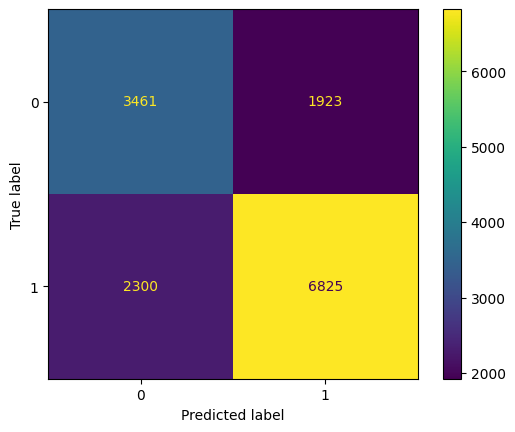

              precision    recall  f1-score   support

           0       0.60      0.64      0.62      5384
           1       0.78      0.75      0.76      9125

    accuracy                           0.71     14509
   macro avg       0.69      0.70      0.69     14509
weighted avg       0.71      0.71      0.71     14509

The cohen_kappa_score of the test set is  0.38524614186225625


In [8]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_under, y_train_under)
y_pred_test = lr.predict(X_test_scaled)
coef = classification.coef_

from sklearn.metrics import cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,cohen_kappa_score, classification_report
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_test))

print("The cohen_kappa_score of the test set is ", cohen_kappa_score(y_test, y_pred_test))

### Comparing different models

We will also define a function and test the dataset with 2 other different regression models so we can select the most relatively accurate model. 
As we can see, both K-neighbour regressor and MLP-regressor have scored lower than the logistic model. As a result, we will continue with our logistic model and print all the coefficients in a pandas dataframe. 

In [9]:
def model_training(X1,X2,y1,y2):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import r2_score,cohen_kappa_score
    from sklearn.linear_model import LogisticRegression 
    from sklearn.neural_network import MLPRegressor
    
    classification = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr')
    classification.fit(X1,y1)
    y_pred = classification.predict(X2)
    cohen_kappa_score = cohen_kappa_score(y2,y_pred)
    
    neigh = KNeighborsRegressor(n_neighbors=6)
    neigh.fit(X1,y1)
    y_pred_2=neigh.predict(X2)
    R2_KN = r2_score(y2,y_pred_2)
    
    regr = MLPRegressor(random_state=1, max_iter=10000).fit(X1,y1)
    regr.predict(X2)
    score = regr.score(X2,y2)
    
    value_list = [cohen_kappa_score,R2_KN,score]
    df = pd.DataFrame(data = value_list, index=['Logistic Regression','KNeighborsRegressor','MLPRegressor'],columns=['R2 score'])
    
    return df

In [10]:
model_training(X_train_under,X_test_scaled,y_train_under,y_test)

,R2 score
Logistic Regression,0.385246
KNeighborsRegressor,0.087890
MLPRegressor,0.231235


In [11]:
coef_df = pd.DataFrame(coef,columns=X_train_scaled.columns)
coef_df

,first_open_hours,first_open_month,first_open_year,dayofweek,age,numscreens,minigame,used_premium_feature,liked,C_check,L_check,S_check,V_check,G_check
0,-0.295157,-0.298704,0.812956,0.078982,-0.595227,2.989859,0.847566,-0.301069,0.024321,0.344929,-0.679621,-0.463568,1.064628,-0.013839


# Conclusion:

From the coefficient table, we can draw the following conclusions: 
1. The app is more favoured by younger people. 
2. Number of touch points has a direct impact on whether or not a user will enrol in the paid version. 
3. The implementation of minigames does increase the likelihood of enrollment. 
4. Among all grouped functions, Credit-related functions and Verification-related functions are the biggest driving factors for enrollment. 
5. Load functions and Saving functions both have a negative impact on the enrollments. 
6. Although from the counterplots before we see a very equal distribution of sign-ups on each day of the week, the model suggests us that in the middle of the week or weekends are more positively related to the final enrollments. 


# Some managerial implications can be: 
1. Target the correct audience. Focus your marketing campaigns on younger audiences and the channels that are more commonly used by youngsters. 
2. Iterate and optimise the user interfaces, making it more interactive so the number of touch points per user increases. 
3. Given that this is a banking mobile app, the core functions such as saving, loading, and etc need immediate attention for improvement. Conduct a more in-depth (qualitative) research on why users seem to be unsatisfied with these functions and update them as soon as possible. 
4. Pay more attention to the timing of your running campaigns. Ideally, it is from Thursday to Saturday and from 4PM till midnight. These hours and days are the busiest period in terms of app activities. 


# Limitations: 
1. The dataset doesn’t come with more information on demographic info other than ages. Further studies can collect other info such as gender, races, and etc to further explore the differences among different users because it helps to create user persona and more personalised user stories. 
2. The list of top screens are not self-explanatory. As a matter of fact, they are grouped by my own interpretation of each column’s literal meaning. Some are obvious but not all are clear. So the UI team should work on a better classification of different functions and conduct more research on how each grouped function affects users’ decision-making. 